In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scanpy as sc
import scipy.stats as ss
import seaborn as sns

sc.settings.set_figure_params(dpi=100)

## Reconstituting the CELL2023 paper definition of PASC

In [2]:
# read in INCOV symptoms
# > rows are patient IDs, columns are symptoms
data_ind = pd.read_csv('../../data/INCOV.PA.symptoms.CELL2023.csv', index_col=0)
data_ind['n_symps'] = data_ind.sum(1)
# read in INCOV symptom groups
# > rows are patient IDs, columns are symptoms
data_grp = pd.read_csv('../../data/INCOV.PA.symptom_groups.CELL2023.csv', index_col=0)
data_grp['n_symps'] = data_ind['n_symps'].copy()

Respiratory vs. None = 1.9613374020228542e-19
Neurological vs. None = 9.928579469118745e-18
Loss of smell/taste vs. None = 6.051486847859285e-16
Gastrointestinal vs. None = 2.620912798565148e-13


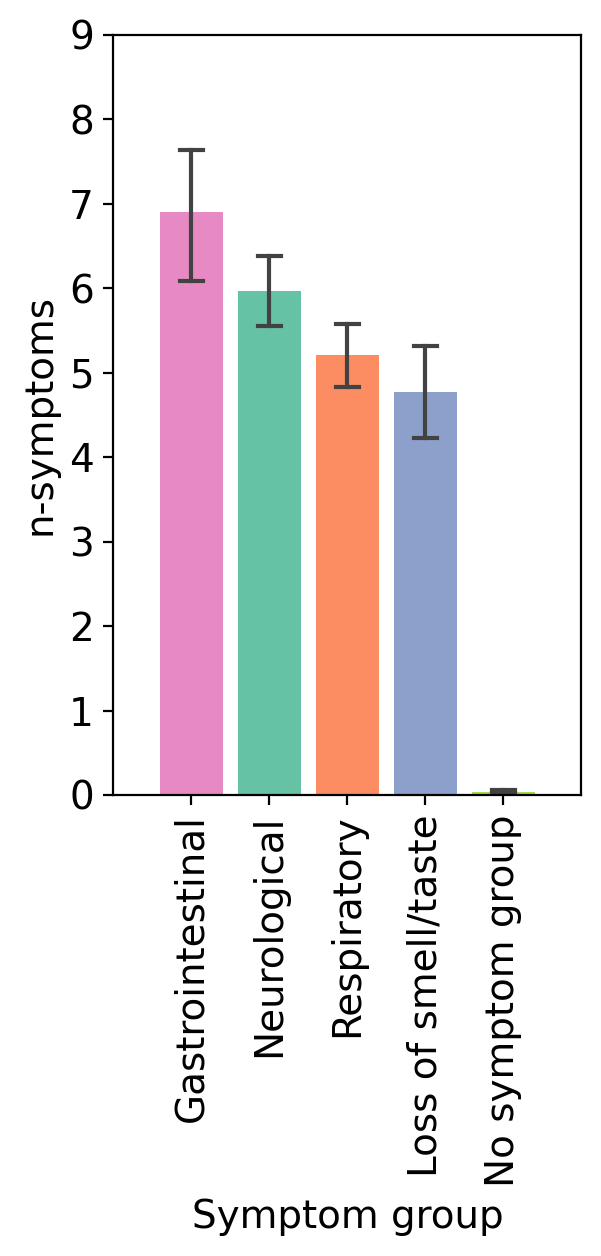

In [3]:
# get colors and palette
palette = sns.color_palette('Set2', 5).as_hex()
palette = palette[3:4] + palette[0:3] + palette[4:5]
order = ['Gastrointestinal','Neurological','Respiratory','Loss of smell/taste','No symptom group']
# create plotting object with each of the symptom groups
plot = pd.DataFrame(columns=['n_symps','group'])
for col in data_grp.columns[:-1]:
    mask = data_grp[col] == 1
    tmp = data_grp.loc[mask, ['n_symps']].copy()
    tmp['group'] = col
    plot = plot.append(tmp)
# grab the control (for patients not in any of these)
mask = (data_grp[order[:-1]] == 0).all(1)
tmp = data_grp.loc[mask, ['n_symps']].copy()
tmp['group'] = 'No symptom group'
plot = plot.append(tmp)
# plot the n-symptoms for each group and control
fig, ax = plt.subplots(figsize=[3, 5])
ax.grid(False)
sns.barplot(x='group', y='n_symps', data=plot, ax=ax,
            saturation=1, ci=68, errwidth=1.5, capsize=0.3,
            palette=palette, order=order)
ax.tick_params(axis='x', labelrotation=90)
ax.set_ylim(0, 9)
ax.set_xlim(-1, 5)
ax.set(xlabel='Symptom group', ylabel='n-symptoms')
# print out p-values
for col in data_grp.columns[:-1]:
    x = plot['n_symps'][plot['group'] == col]
    y = plot['n_symps'][plot['group'] == 'No symptom group']
    u, p = ss.mannwhitneyu(x, y, alternative='two-sided')
    print(f'{col} vs. None =', p)

Respiratory vs. None = 1.9613374020228542e-19
Neurological vs. None = 9.928579469118745e-18
Loss of smell/taste vs. None = 6.051486847859285e-16
Gastrointestinal vs. None = 2.620912798565148e-13


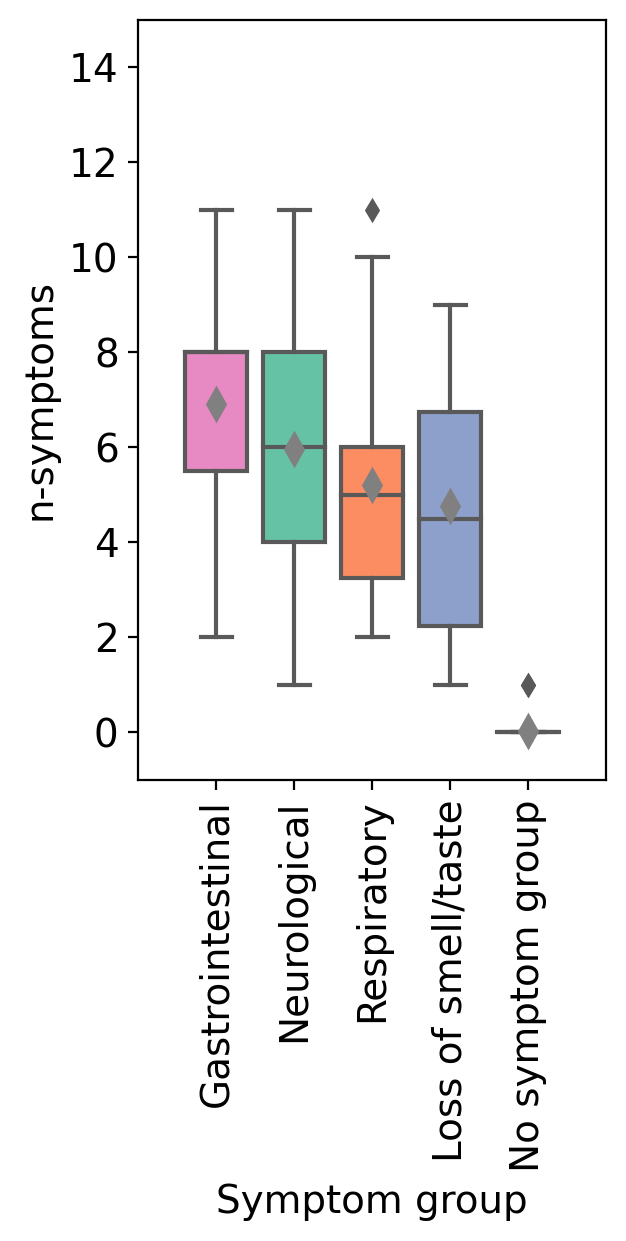

In [4]:
# plot the n-symptoms for each group and control
fig, ax = plt.subplots(figsize=[3, 5])
ax.grid(False)
sns.boxplot(x='group', y='n_symps', data=plot, ax=ax,
            saturation=1, showmeans=True,
            meanprops={'marker':'d',
                       'markerfacecolor':'grey', 
                       'markeredgecolor':'grey',
                       'markersize':'8'},
            palette=palette, order=order)
ax.tick_params(axis='x', labelrotation=90)
ax.set_ylim(-1, 15)
ax.set_xlim(-1, 5)
ax.set(xlabel='Symptom group', ylabel='n-symptoms')
# print out p-values
for col in data_grp.columns[:-1]:
    x = plot['n_symps'][plot['group'] == col]
    y = plot['n_symps'][plot['group'] == 'No symptom group']
    u, p = ss.mannwhitneyu(x, y, alternative='two-sided')
    print(f'{col} vs. None =', p)

[Text(0.5, 0, 'Symptom group'), Text(0, 0.5, 'n-patients in group')]

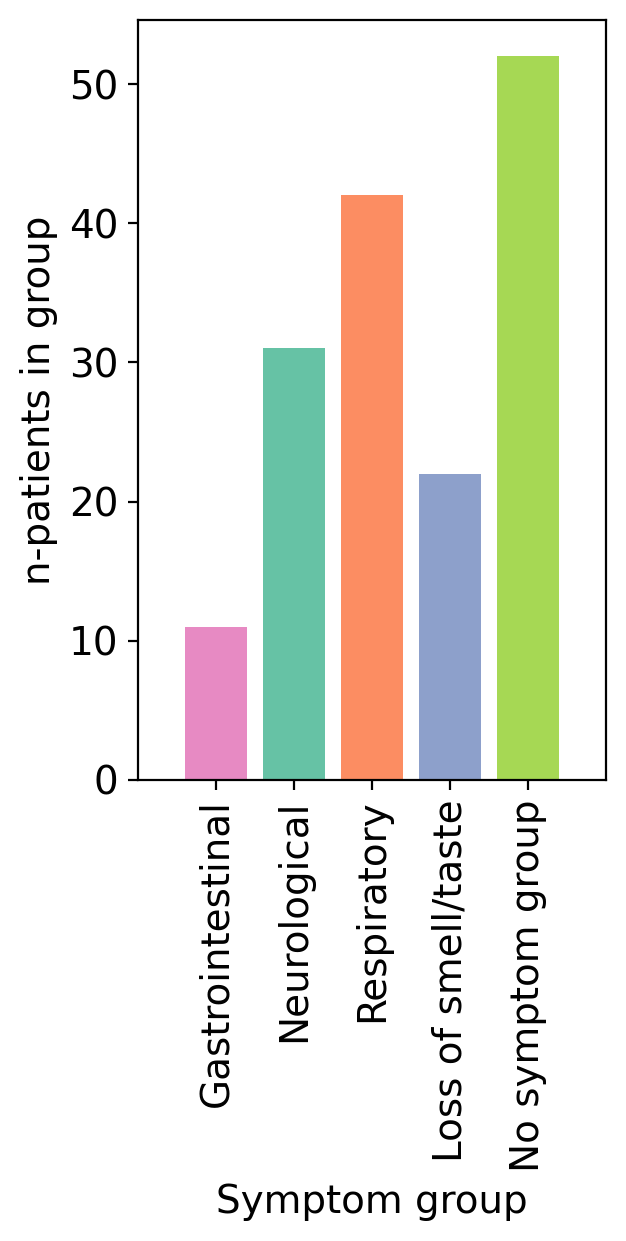

In [5]:
# plot the number of patients in each group
fig, ax = plt.subplots(figsize=[3, 5])
ax.grid(False)
ax.bar(order, plot['group'].value_counts().loc[order],
       color=palette)
ax.tick_params(axis='x', labelrotation=90)
ax.set_xlim(-1, 5)
ax.set(xlabel='Symptom group', ylabel='n-patients in group')

In [6]:
# provide the numbers and percentages
print('Symptom group', '+', 'total', '%', sep=', ')
print('---------------------------')
for col in order[:-1]:
    pos = sum(data_grp[col] == 1)
    neg = sum(data_grp[col] == 0)
    print(col, pos, (pos + neg), round(pos / (pos + neg) * 100, 4), sep=', ')
# grab the control (for patients not in any of these)
pos = sum((data_grp == 0).all(1))
neg = sum(~(data_grp == 0).all(1))
print('No symptom group', pos, (pos + neg), round(pos / (pos + neg) * 100, 4), sep=', ')

Symptom group, +, total, %
---------------------------
Gastrointestinal, 11, 125, 8.8
Neurological, 31, 125, 24.8
Respiratory, 42, 101, 41.5842
Loss of smell/taste, 22, 125, 17.6
No symptom group, 50, 125, 40.0


## Compare CELL2023 PASC groups with JAMA score

In [7]:
# read in JAMA score for INCOV patients
INCOV_scores = pd.read_csv('outputs/INCOV.JAMA_scores.csv', squeeze=True, index_col=0)
# add on JAMA score to the plotting object
plot['JAMA_score'] = plot.index.map(INCOV_scores)

Respiratory vs. None = 2.0012484344948836e-18
Neurological vs. None = 1.535014155109589e-17
Loss of smell/taste vs. None = 1.644994748030565e-16
Gastrointestinal vs. None = 1.0223827538570042e-13


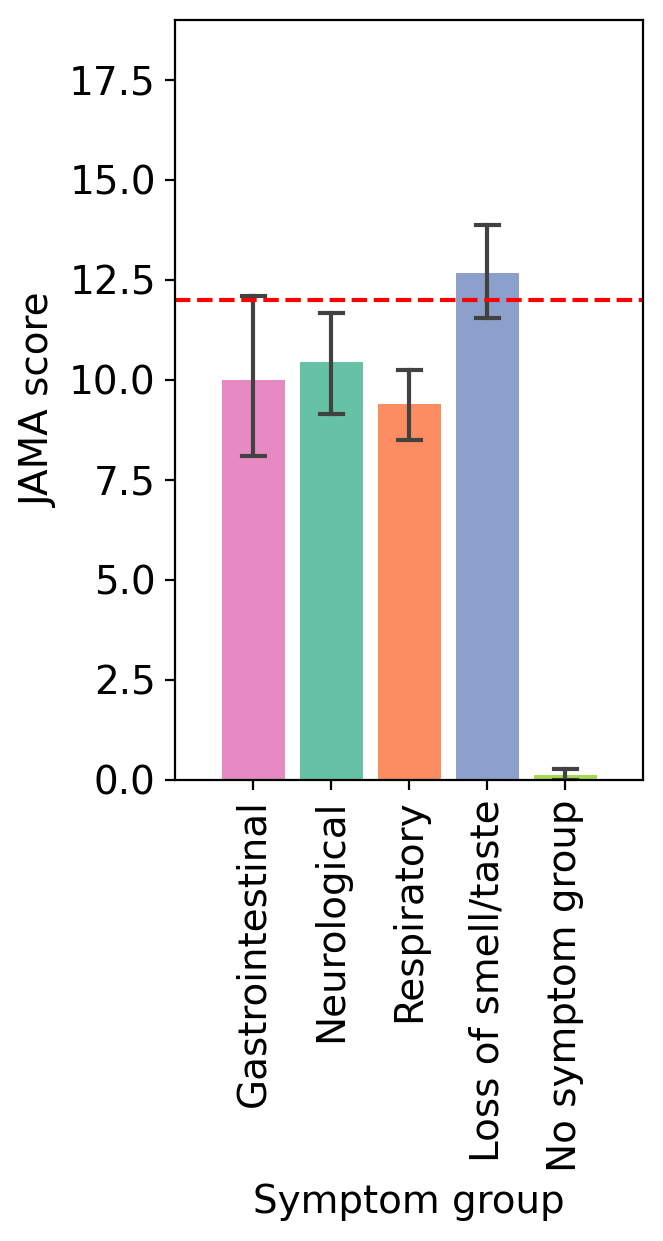

In [8]:
# plot the JAMA score for each group and control
fig, ax = plt.subplots(figsize=[3, 5])
ax.grid(False)
sns.barplot(x='group', y='JAMA_score', data=plot, ax=ax,
            saturation=1, ci=68, errwidth=1.5, capsize=0.3,
            palette=palette, order=order)
ax.tick_params(axis='x', labelrotation=90)
ax.set_ylim(0, 19)
ax.set_xlim(-1, 5)
ax.set(xlabel='Symptom group', ylabel='JAMA score')
xmin, xmax = ax.get_xlim()
ax.plot([xmin, xmax], [12] * 2, color='r', linestyle='--')
ax.set_xlim(xmin, xmax)
# print out p-values
for col in data_grp.columns[:-1]:
    x = plot['JAMA_score'][plot['group'] == col]
    y = plot['JAMA_score'][plot['group'] == 'No symptom group']
    u, p = ss.mannwhitneyu(x, y, alternative='two-sided')
    print(f'{col} vs. None =', p)

Respiratory vs. None = 2.0012484344948836e-18
Neurological vs. None = 1.535014155109589e-17
Loss of smell/taste vs. None = 1.644994748030565e-16
Gastrointestinal vs. None = 1.0223827538570042e-13


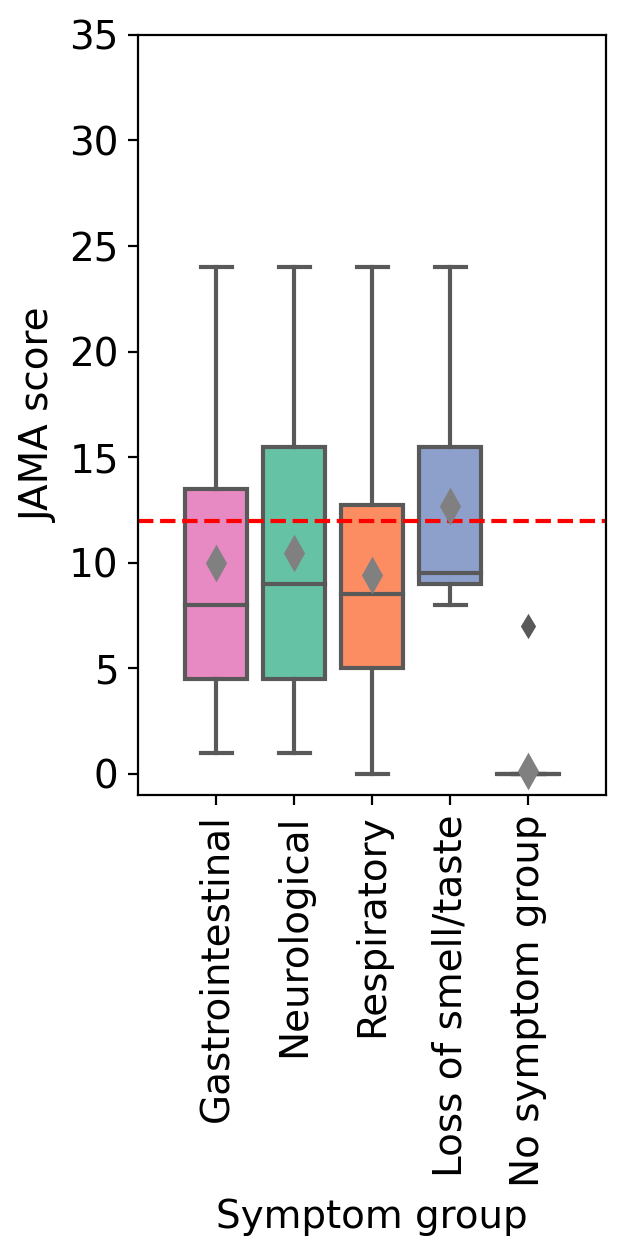

In [9]:
# plot the JAMA score for each group and control
fig, ax = plt.subplots(figsize=[3, 5])
ax.grid(False)
sns.boxplot(x='group', y='JAMA_score', data=plot, ax=ax,
            saturation=1, showmeans=True,
            meanprops={'marker':'d',
                       'markerfacecolor':'grey', 
                       'markeredgecolor':'grey',
                       'markersize':'8'},
            palette=palette, order=order)
ax.tick_params(axis='x', labelrotation=90)
ax.set_ylim(-1, 35)
ax.set_xlim(-1, 5)
ax.set(xlabel='Symptom group', ylabel='JAMA score')
xmin, xmax = ax.get_xlim()
ax.plot([xmin, xmax], [12] * 2, color='r', linestyle='--')
ax.set_xlim(xmin, xmax)
# print out p-values
for col in data_grp.columns[:-1]:
    x = plot['JAMA_score'][plot['group'] == col]
    y = plot['JAMA_score'][plot['group'] == 'No symptom group']
    u, p = ss.mannwhitneyu(x, y, alternative='two-sided')
    print(f'{col} vs. None =', p)

<AxesSubplot:>

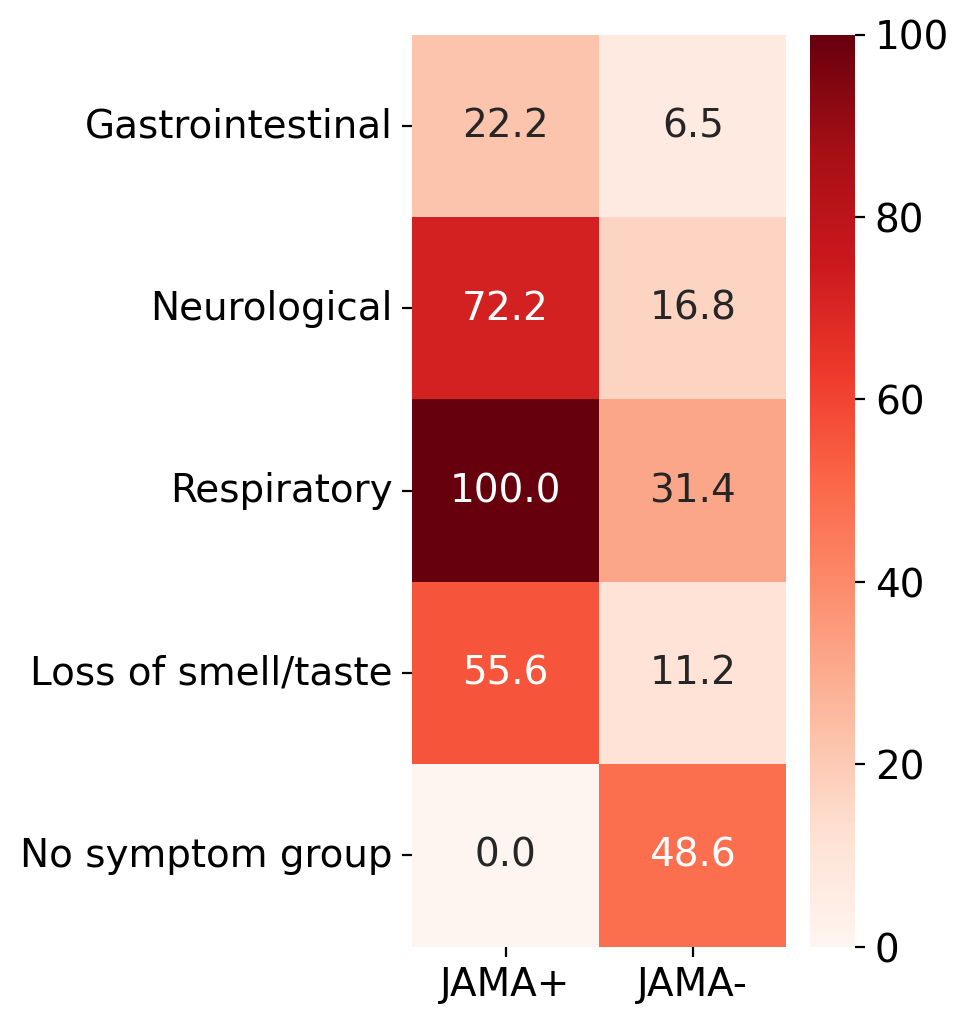

In [10]:
# add on JAMA scores to the original data dataframe
data_grp['JAMA_score'] = INCOV_scores
data_grp['JAMA_group'] = np.nan
data_grp.loc[data_grp['JAMA_score'] >= 12, 'JAMA_group'] = 'JAMA+'
data_grp.loc[data_grp['JAMA_score'] < 12, 'JAMA_group'] = 'JAMA-'
# retrieve data for a heatmap of the percentage of patients that pass this score for each category
plot = pd.DataFrame(index=order, columns=['JAMA+','JAMA-'])
for idy in plot.columns:
    mask = data_grp['JAMA_group'] == idy
    plot.loc[order[:-1], idy] = data_grp.loc[mask, order[:-1]].mean(0)
# retrieve data for the control group
mask = (data_grp[order[:-1]] == 0).all(1)
mask_p = data_grp.loc[mask, 'JAMA_score'] >= 12
mask_n = data_grp.loc[mask, 'JAMA_score'] < 12
plot.loc['No symptom group', 'JAMA+'] = np.sum(mask_p) / np.sum(data_grp['JAMA_score'] >= 12)
plot.loc['No symptom group', 'JAMA-'] = np.sum(mask_n) / np.sum(data_grp['JAMA_score'] < 12)
# plot the heatmap in question
fig, ax = plt.subplots(figsize=[3, 6])
sns.heatmap(plot.astype(float) * 100, annot=True, cmap='Reds', fmt='.1f', ax=ax)

## Combining CELL2023 PASC groups and comparing with JAMA and n-symptoms

In [11]:
# create the new grouping
data_grp['PASC_status'] = np.nan
data_grp.loc[(data_grp[order[:-1]] >= 1).any(1), 'PASC_status'] = 'PASC+'
data_grp.loc[(data_grp[order[:-1]] == 0).all(1), 'PASC_status'] = 'PASC-'

PASC+ vs. PASC- = 1.0321696433734405e-21


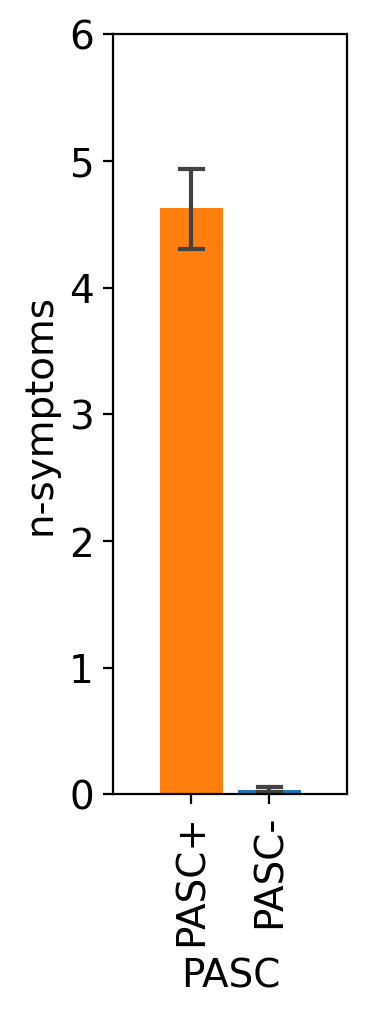

In [12]:
# plot the n-symptoms for each group and control
fig, ax = plt.subplots(figsize=[1.5, 5])
ax.grid(False)
sns.barplot(x='PASC_status', y='n_symps', data=data_grp, ax=ax,
            saturation=1, ci=68, errwidth=1.5, capsize=0.3,
            palette=['tab:orange','tab:blue'], order=['PASC+','PASC-'])
ax.tick_params(axis='x', labelrotation=90)
ax.set_ylim(0, 6)
ax.set_xlim(-1, 2)
ax.set(xlabel='PASC', ylabel='n-symptoms')
# print out p-values
x = data_grp['n_symps'][data_grp['PASC_status'] == 'PASC+']
y = data_grp['n_symps'][data_grp['PASC_status'] == 'PASC-']
u, p = ss.mannwhitneyu(x, y, alternative='two-sided')
print(f'PASC+ vs. PASC- =', p)

PASC+ vs. PASC- = 1.0321696433734405e-21


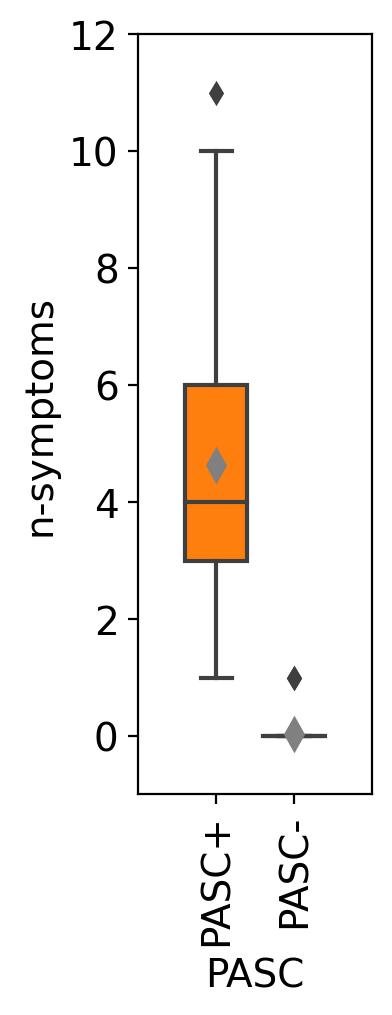

In [13]:
# plot the JAMA score for each group and control
fig, ax = plt.subplots(figsize=[1.5, 5])
ax.grid(False)
sns.boxplot(x='PASC_status', y='n_symps', data=data_grp, ax=ax,
            saturation=1, showmeans=True,
            meanprops={'marker':'d',
                       'markerfacecolor':'grey', 
                       'markeredgecolor':'grey',
                       'markersize':'8'},
            palette=['tab:orange','tab:blue'], order=['PASC+','PASC-'])
ax.tick_params(axis='x', labelrotation=90)
ax.set_ylim(-1, 12)
ax.set_xlim(-1, 2)
ax.set(xlabel='PASC', ylabel='n-symptoms')
# print out p-values
x = data_grp['n_symps'][data_grp['PASC_status'] == 'PASC+']
y = data_grp['n_symps'][data_grp['PASC_status'] == 'PASC-']
u, p = ss.mannwhitneyu(x, y, alternative='two-sided')
print(f'PASC+ vs. PASC- =', p)

PASC+ vs. PASC- = 9.015094146154323e-21


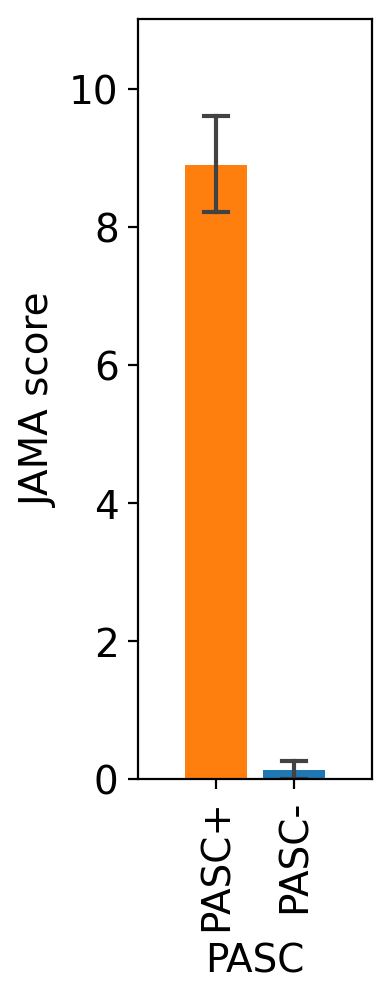

In [14]:
# plot the JAMA score for each group and control
fig, ax = plt.subplots(figsize=[1.5, 5])
ax.grid(False)
sns.barplot(x='PASC_status', y='JAMA_score', data=data_grp, ax=ax,
            saturation=1, ci=68, errwidth=1.5, capsize=0.3,
            palette=['tab:orange','tab:blue'], order=['PASC+','PASC-'])
ax.tick_params(axis='x', labelrotation=90)
ax.set_ylim(0, 11)
ax.set_xlim(-1, 2)
ax.set(xlabel='PASC', ylabel='JAMA score')
xmin, xmax = ax.get_xlim()
ax.plot([xmin, xmax], [12] * 2, color='r', linestyle='--')
ax.set_xlim(xmin, xmax)
# print out p-values
x = data_grp['JAMA_score'][data_grp['PASC_status'] == 'PASC+']
y = data_grp['JAMA_score'][data_grp['PASC_status'] == 'PASC-']
u, p = ss.mannwhitneyu(x, y, alternative='two-sided')
print(f'PASC+ vs. PASC- =', p)

PASC+ vs. PASC- = 9.015094146154323e-21


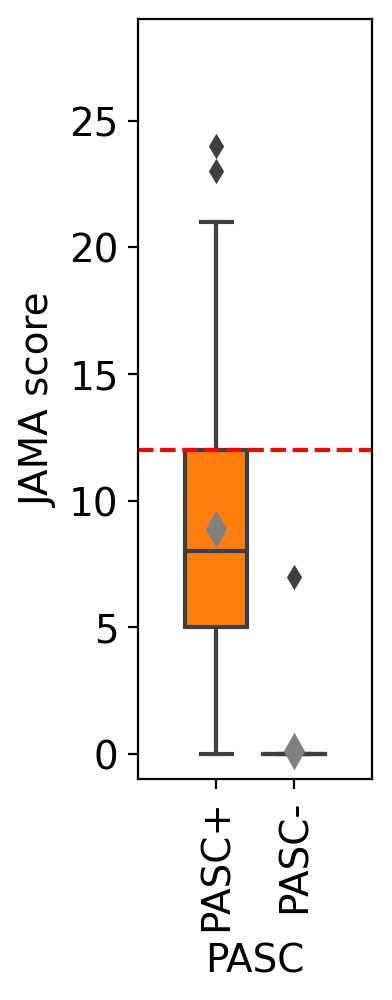

In [15]:
# plot the JAMA score for each group and control
fig, ax = plt.subplots(figsize=[1.5, 5])
ax.grid(False)
sns.boxplot(x='PASC_status', y='JAMA_score', data=data_grp, ax=ax,
            saturation=1, showmeans=True,
            meanprops={'marker':'d',
                       'markerfacecolor':'grey', 
                       'markeredgecolor':'grey',
                       'markersize':'8'},
            palette=['tab:orange','tab:blue'], order=['PASC+','PASC-'])
ax.tick_params(axis='x', labelrotation=90)
ax.set_ylim(-1, 29)
ax.set_xlim(-1, 2)
ax.set(xlabel='PASC', ylabel='JAMA score')
xmin, xmax = ax.get_xlim()
ax.plot([xmin, xmax], [12] * 2, color='r', linestyle='--')
ax.set_xlim(xmin, xmax)
# print out p-values
x = data_grp['JAMA_score'][data_grp['PASC_status'] == 'PASC+']
y = data_grp['JAMA_score'][data_grp['PASC_status'] == 'PASC-']
u, p = ss.mannwhitneyu(x, y, alternative='two-sided')
print(f'PASC+ vs. PASC- =', p)

<AxesSubplot:>

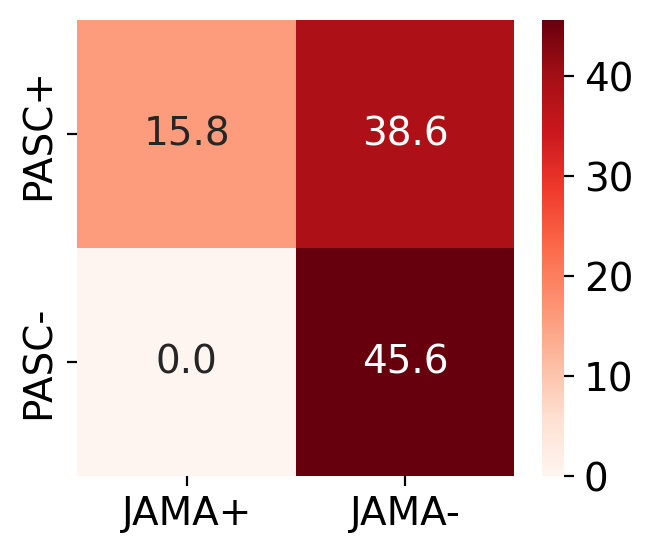

In [16]:
# retrieve data for a heatmap of the percentage of patients that pass this score for each category
plot = pd.DataFrame(index=['PASC+','PASC-'], columns=['JAMA+','JAMA-'])
for idx in plot.index:
    mask = data_grp['PASC_status'] == idx
    mask_p = data_grp.loc[mask, 'JAMA_score'] >= 12
    mask_n = data_grp.loc[mask, 'JAMA_score'] < 12
    plot.loc[idx, 'JAMA+'] = np.sum(mask_p)
    plot.loc[idx, 'JAMA-'] = np.sum(mask_n)
plot /= plot.sum().sum()
# plot the heatmap in question
fig, ax = plt.subplots(figsize=[3.5, 3])
sns.heatmap(plot.astype(float) * 100, annot=True, cmap='Reds', fmt='.1f', ax=ax)

In [17]:
# compute additional statistics
ppv = plot.loc['PASC+','JAMA+'] / plot['JAMA+'].sum()
npv = plot.loc['PASC-','JAMA-'] / plot['JAMA-'].sum()
sensitivity = plot.loc['PASC+','JAMA+'] / plot.loc['PASC+'].sum()
specificity = plot.loc['PASC-','JAMA-'] / plot.loc['PASC-'].sum()
print('PPV =', ppv)
print('NPV =', npv)
print('Sensitivity =', sensitivity)
print('Specificity =', specificity)

PPV = 1.0
NPV = 0.5416666666666666
Sensitivity = 0.2903225806451613
Specificity = 1.0


In [18]:
# check what score gets the most patients
vmax = int(max(data_grp['JAMA_score']) + 1)
plot = pd.DataFrame(columns=['JAMA_score_cutoff','n_PASC+_captured','n_PASC-_captured'])
for x in range(vmax):
    mask = (data_grp['JAMA_score'] >= x) & (~data_grp['PASC_status'].isna())
    n_p = np.sum(data_grp.loc[mask, 'PASC_status'] == 'PASC+')
    n_n = np.sum(data_grp.loc[mask, 'PASC_status'] == 'PASC-')
    plot.loc[plot.shape[0]] = x, n_p, n_n

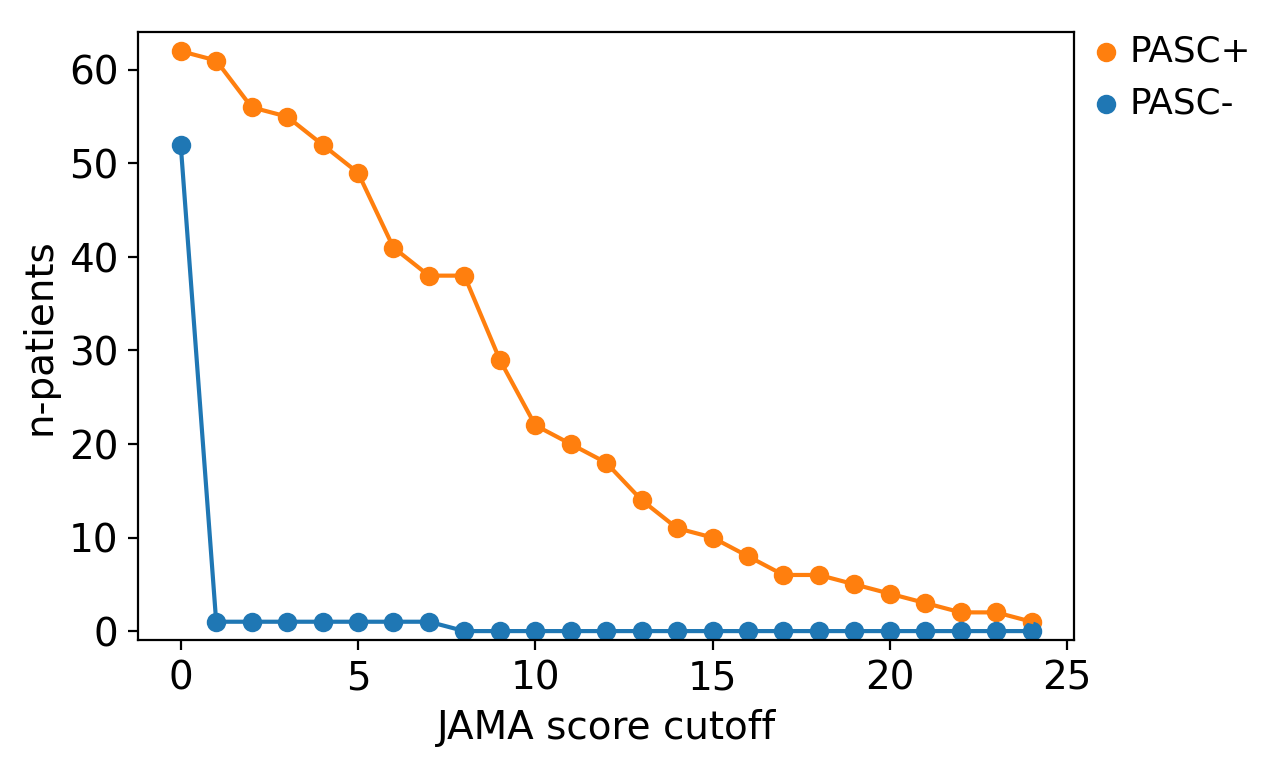

In [19]:
# plot the graph of these values
fig, ax = plt.subplots(figsize=[6, 4])
ax.grid(False)
ax.scatter(plot['JAMA_score_cutoff'], plot['n_PASC+_captured'], color='tab:orange', label='PASC+')
ax.plot(plot['JAMA_score_cutoff'], plot['n_PASC+_captured'], color='tab:orange')
ax.scatter(plot['JAMA_score_cutoff'], plot['n_PASC-_captured'], color='tab:blue', label='PASC-')
ax.plot(plot['JAMA_score_cutoff'], plot['n_PASC-_captured'], color='tab:blue')
ax.set_ylim(-1, 64)
ax.set(xlabel='JAMA score cutoff', ylabel='n-patients')
ax.legend(bbox_to_anchor=(0.99, 1.05), bbox_transform=ax.transAxes,
          loc='upper left', frameon=False)

In [20]:
# compute into percentages
new_cols = ['perc_PASC+_captured','perc_PASC-_captured']
old_cols = ['n_PASC+_captured','n_PASC-_captured']
plot[new_cols] = 100 * plot[old_cols] / sum(~data_grp['PASC_status'].isna())

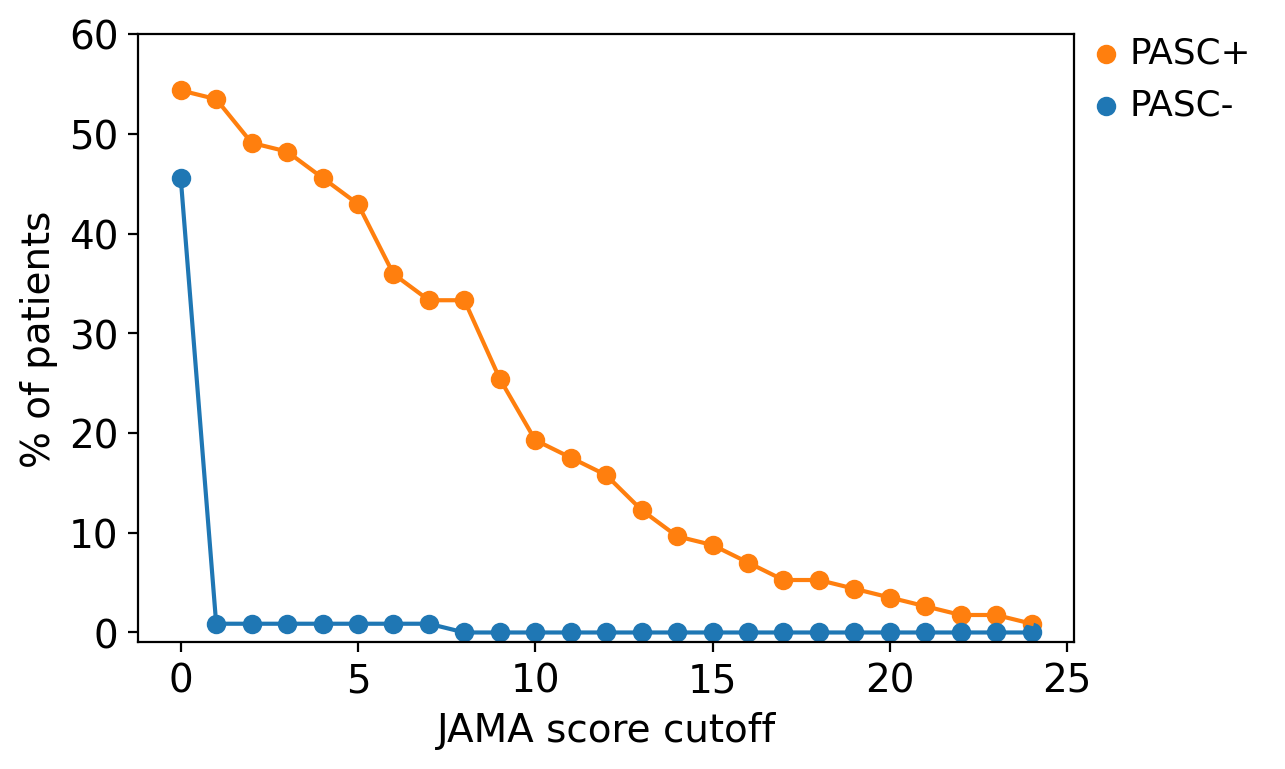

In [21]:
# plot the graph of these values
fig, ax = plt.subplots(figsize=[6, 4])
ax.grid(False)
ax.scatter(plot['JAMA_score_cutoff'], plot['perc_PASC+_captured'], color='tab:orange', label='PASC+')
ax.plot(plot['JAMA_score_cutoff'], plot['perc_PASC+_captured'], color='tab:orange')
ax.scatter(plot['JAMA_score_cutoff'], plot['perc_PASC-_captured'], color='tab:blue', label='PASC-')
ax.plot(plot['JAMA_score_cutoff'], plot['perc_PASC-_captured'], color='tab:blue')
ax.set_ylim(-1, 60)
ax.set(xlabel='JAMA score cutoff', ylabel='% of patients')
ax.legend(bbox_to_anchor=(0.99, 1.05), bbox_transform=ax.transAxes,
          loc='upper left', frameon=False)

## Characterize patients who are PASC+ but JAMA- compared to those who are JAMA+

In [22]:
# grab the appropiate patients by first defining masks
mask = data_grp['PASC_status'] == 'PASC+'
tmp = data_grp.loc[mask].copy()
mask_p = tmp['JAMA_score'] >= 12
mask_n = tmp['JAMA_score'] < 12
# append the dataframes to each other
plot_p = tmp.loc[mask_p, :]
plot_p['group'] = 'JAMA+'
plot_n = tmp.loc[mask_n, :]
plot_n['group'] = 'JAMA-'
plot = plot_p.append(plot_n)

/tmp/ipykernel_5492/412008211.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_p['group'] = 'JAMA+'
/tmp/ipykernel_5492/412008211.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_n['group'] = 'JAMA-'


PASC+ vs. PASC- = 6.5065350836538245e-06


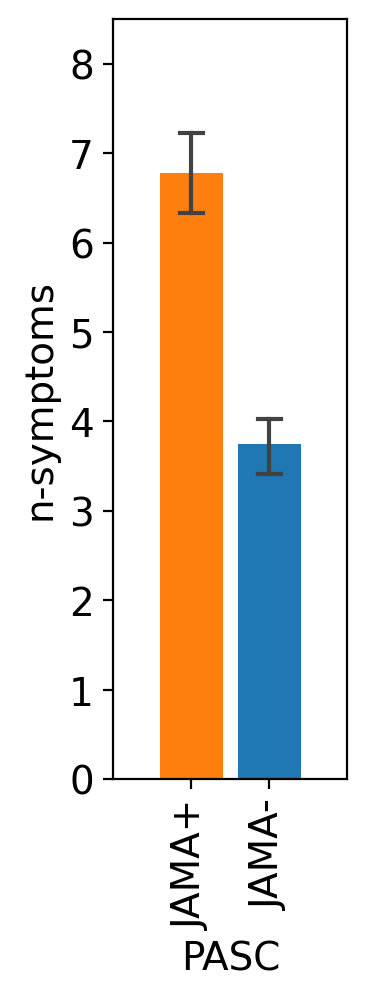

In [23]:
# plot the n-symptoms for each group and control
fig, ax = plt.subplots(figsize=[1.5, 5])
ax.grid(False)
sns.barplot(x='group', y='n_symps', data=plot, ax=ax,
            saturation=1, ci=68, errwidth=1.5, capsize=0.3,
            palette=['tab:orange','tab:blue'], order=['JAMA+','JAMA-'])
ax.tick_params(axis='x', labelrotation=90)
ax.set_ylim(0, 8.5)
ax.set_xlim(-1, 2)
ax.set(xlabel='PASC', ylabel='n-symptoms')
# print out p-values
x = plot['n_symps'][plot['group'] == 'JAMA+']
y = plot['n_symps'][plot['group'] == 'JAMA-']
u, p = ss.mannwhitneyu(x, y, alternative='two-sided')
print(f'PASC+ vs. PASC- =', p)

PASC+ vs. PASC- = 6.5065350836538245e-06


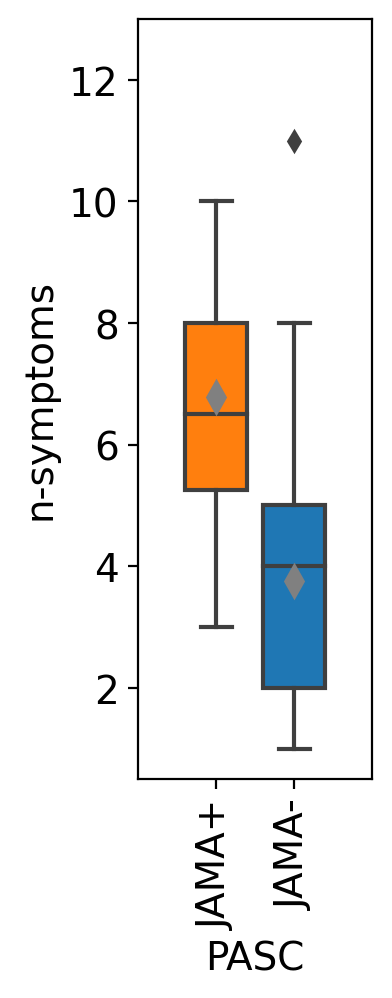

In [24]:
# plot the n-symptoms for each group and control
fig, ax = plt.subplots(figsize=[1.5, 5])
ax.grid(False)
sns.boxplot(x='group', y='n_symps', data=plot, ax=ax,
            saturation=1, showmeans=True,
            meanprops={'marker':'d',
                       'markerfacecolor':'grey', 
                       'markeredgecolor':'grey',
                       'markersize':'8'},
            palette=['tab:orange','tab:blue'], order=['JAMA+','JAMA-'])
ax.tick_params(axis='x', labelrotation=90)
ax.set_ylim(0.5, 13)
ax.set_xlim(-1, 2)
ax.set(xlabel='PASC', ylabel='n-symptoms')
# print out p-values
x = plot['n_symps'][plot['group'] == 'JAMA+']
y = plot['n_symps'][plot['group'] == 'JAMA-']
u, p = ss.mannwhitneyu(x, y, alternative='two-sided')
print(f'PASC+ vs. PASC- =', p)

<AxesSubplot:>

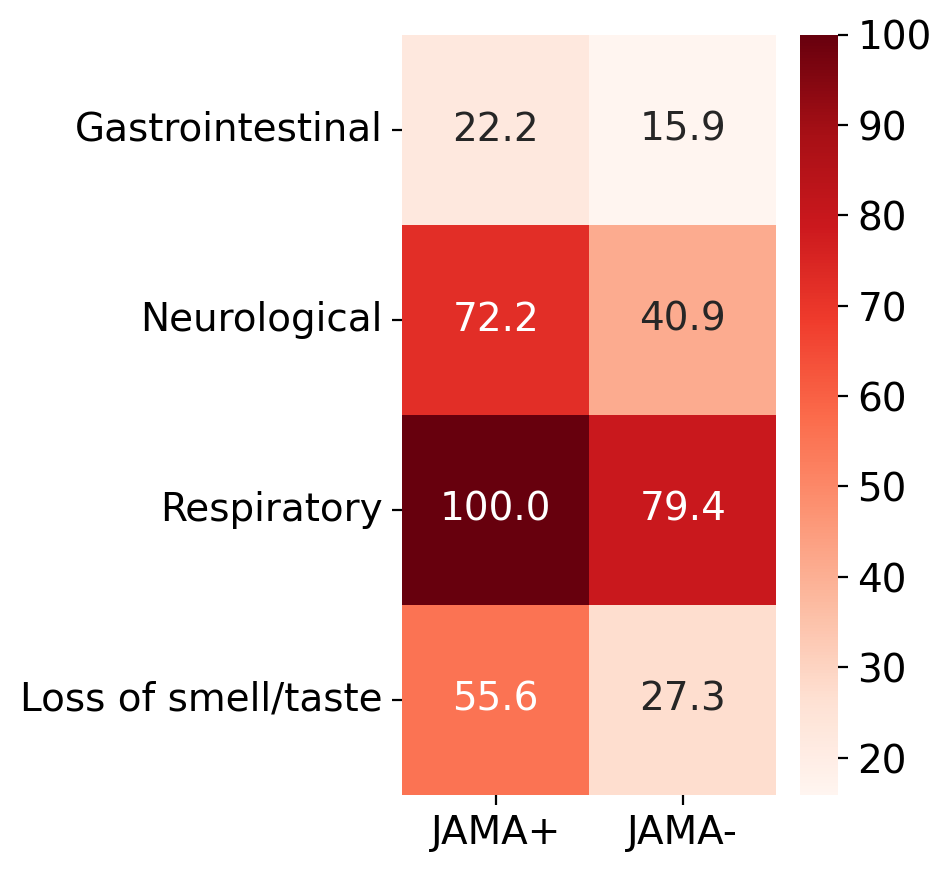

In [25]:
# copy over the plot object onto a temporary object to create a new plot
tmp = plot.copy()
# retrieve data for a heatmap of the percentage of patients that pass this score for each category
plot = pd.DataFrame(index=order[:-1], columns=['JAMA+','JAMA-'])
for idy in plot.columns:
    mask = tmp['group'] == idy
    plot[idy] = tmp.loc[mask, plot.index].mean(0)
# plot the heatmap in question
fig, ax = plt.subplots(figsize=[3, 5])
sns.heatmap(plot.astype(float) * 100, annot=True, cmap='Reds', fmt='.1f', ax=ax)